# Ejercicios de Análisis de Datos de Ventas

En este notebook se proponen 10 ejercicios diferentes utilizando un dataset de ventas. Cada ejercicio requiere aplicar operaciones de agrupación (*groupby*), conteo de valores (*value_counts*), cálculos de medias, y generar visualizaciones para responder preguntas específicas.

El dataset de ejemplo tiene la siguiente estructura:

| InvoiceNo | StockCode | Description                                    | Quantity | InvoiceDate        | UnitPrice | CustomerID | Country        |
|-----------|-----------|------------------------------------------------|----------|--------------------|-----------|------------|----------------|
| 536365    | 85123A    | WHITE HANGING HEART T-LIGHT HOLDER             | 6        | 12/1/2010 8:26     | 2.55      | 17850.0    | United Kingdom |
| 536365    | 71053     | WHITE METAL LANTERN                            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |
| 536365    | 84406B    | CREAM CUPID HEARTS COAT HANGER                 | 8        | 12/1/2010 8:26     | 2.75      | 17850.0    | United Kingdom |
| 536365    | 84029G    | KNITTED UNION FLAG HOT WATER BOTTLE            | 6        | 12/1/2010 8:26     | 3.39      | 17850.0    | United Kingdom |

Puedes ampliar el dataset según sea necesario para los ejercicios.

In [ ]:
!wget https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
!unzip customer_segmentation.csv.zip

--2025-03-20 21:00:12--  https://github.com/javierherrera1996/IntroMarketingAnalytics/raw/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip [following]
--2025-03-20 21:00:13--  https://raw.githubusercontent.com/javierherrera1996/IntroMarketingAnalytics/refs/heads/main/PrimerCorte/customer_segmentation.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7548720 (7.2M) [application/zip]
Saving to: ‘customer_segmentation.csv.zip’

customer_s

## Preparación del Dataset

Primero, importamos las librerías necesarias, creamos el DataFrame de ejemplo y realizamos las conversiones correspondientes.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Creación del DataFrame de ejemplo
data = pd.read_csv('customer_segmentation.csv',encoding="latin-1")

data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [ ]:
# Convertir InvoiceDate a tipo datetime
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], format='%m/%d/%Y %H:%M')

# Mostrar el DataFrame
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


## Ejercicio 1: Exploración del Dataset

Realiza una exploración básica del dataset: muestra las primeras filas, la información general (con `.info()`) y verifica si hay datos nulos.

In [ ]:
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
data.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


In [ ]:
data_sin_nulos = data.dropna()

In [ ]:
data_sin_nulos.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,0
Country,0


## Ejercicio 2: Agrupación por País

Agrupa los datos por la columna `Country` para:
- Calcular el total de `Quantity` vendido por país.
- Calcular la media de `UnitPrice` por país.

Visualiza el total de `Quantity` por país utilizando un gráfico de barras. Dame los 5 primeros

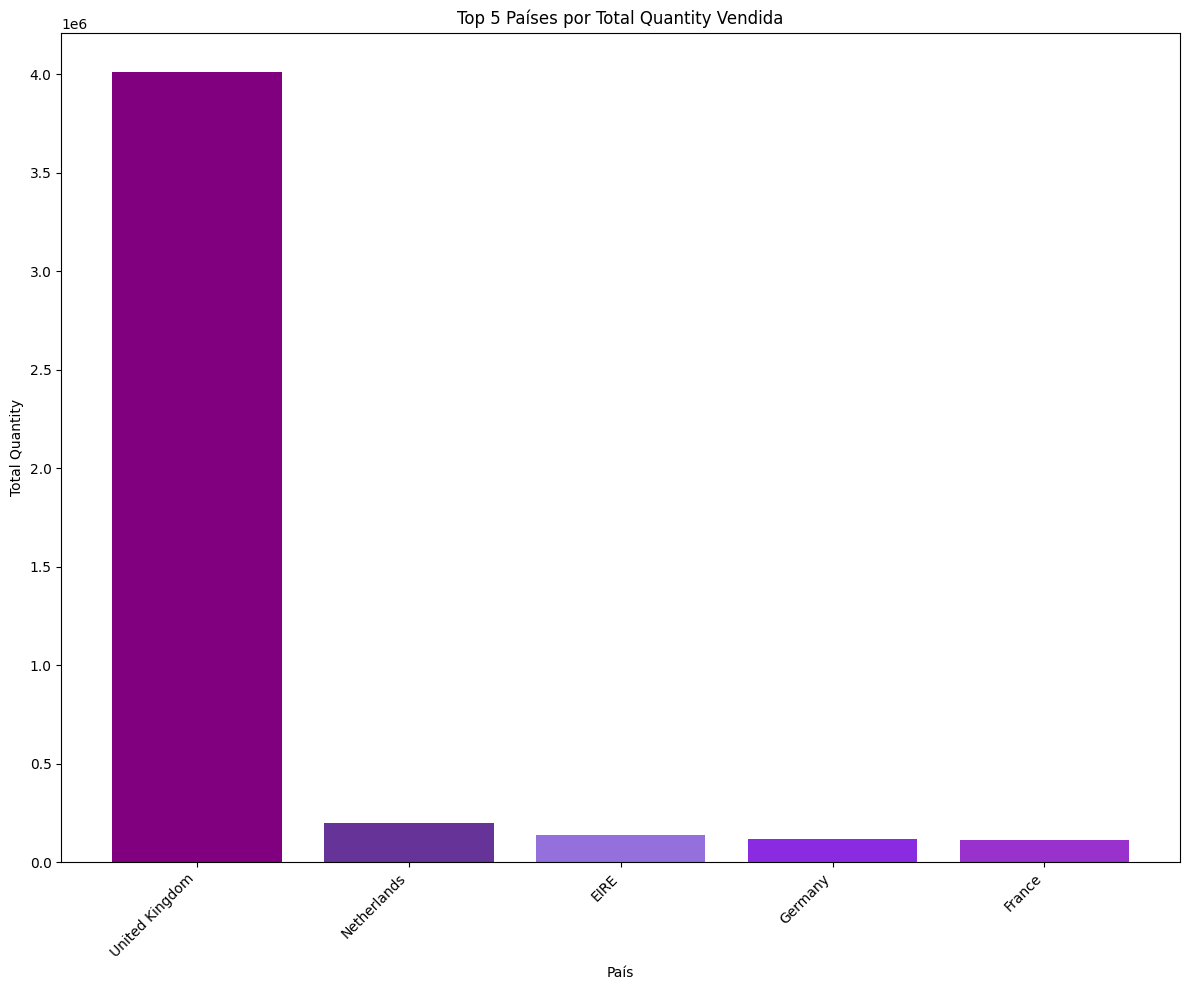

In [ ]:
# Agrupar por país y calcular las métricas
country_data = data_sin_nulos.groupby('Country').agg({'Quantity': 'sum', 'UnitPrice': 'mean'})

# Ordenar por Quantity descendente y obtener los 5 primeros
top_5_countries = country_data.sort_values(by='Quantity', ascending=False).head(5)

# Visualizar con gráfico de barras
plt.figure(figsize=(12,10))

# Add color to the bars:
plt.bar(top_5_countries.index, top_5_countries['Quantity'], color=['purple', 'rebeccapurple', 'mediumpurple', 'blueviolet', 'darkorchid'])

plt.xlabel('País')
plt.ylabel('Total Quantity')
plt.title('Top 5 Países por Total Quantity Vendida')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()  # Ajustar el diseño para evitar que las etiquetas se superpongan
#To see the output, run the code.



## Ejercicio 3: Frecuencia de StockCode

Agrupa el DataFrame por `StockCode` y cuenta la frecuencia de cada producto. Utiliza `value_counts` para verificar el resultado.

Visualiza los StockCode más frecuentes con un gráfico de barras horizontal. Dame los 10 primeros

In [ ]:
stock_counts = data_sin_nulos.groupby('StockCode')['StockCode'].count().sort_values(ascending=False)

# Alternative using value_counts:
#stock_counts = data['StockCode'].value_counts()

In [ ]:
top_10_stockcodes = stock_counts.head(10)

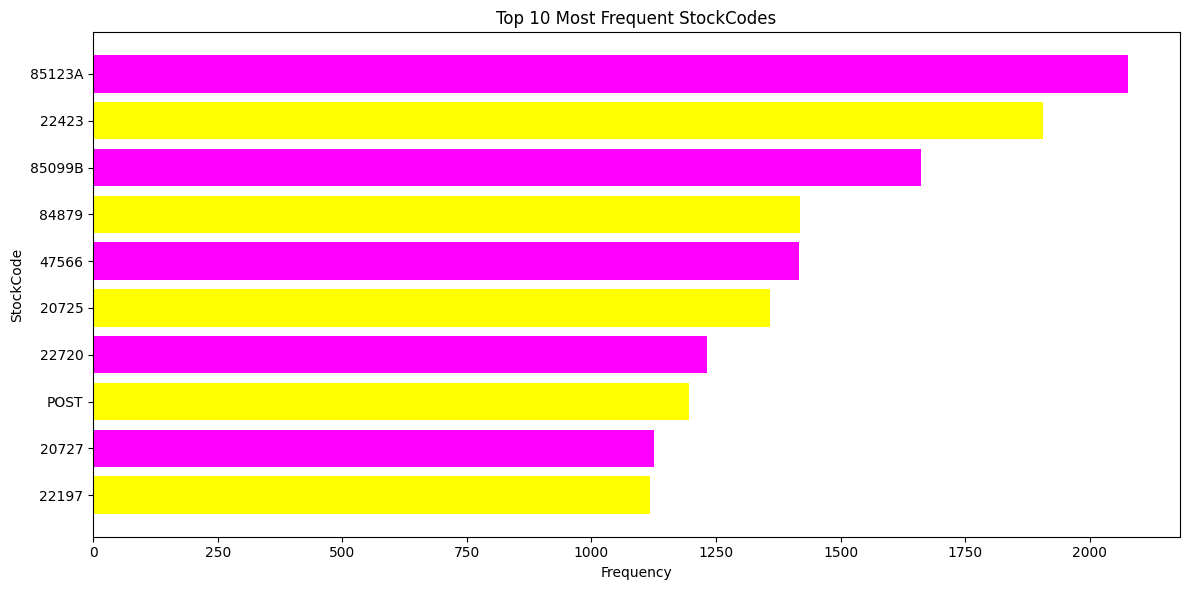

In [ ]:
plt.figure(figsize=(12, 6))

# Create a list of colors, alternating between fuchsia and yellow
colors = ['fuchsia', 'yellow'] * (len(top_10_stockcodes) // 2)
# If there's an odd number of bars, add one more color
if len(top_10_stockcodes) % 2 != 0:
    colors.append('fuchsia')

plt.barh(top_10_stockcodes.index, top_10_stockcodes.values, color=colors)

plt.xlabel('Frequency')
plt.ylabel('StockCode')
plt.title('Top 10 Most Frequent StockCodes')
plt.gca().invert_yaxis()
plt.tight_layout()
#To see the output, run the code.

## Ejercicio 4: Ventas Totales por Factura

1. Crea una nueva columna llamada `TotalPrice` que sea el producto de `Quantity` y `UnitPrice`.
2. Agrupa los datos por `InvoiceNo` y calcula la suma de `TotalPrice` para cada factura.
3. Calcula la factura promedio (media) del total de ventas por factura.

Visualiza la distribución de los totales de factura con un histograma.

In [ ]:
data_sin_nulos['TotalPrice'] = data_sin_nulos['Quantity'] * data_sin_nulos['UnitPrice']

<ipython-input-13-d667123e2f8f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_sin_nulos['TotalPrice'] = data_sin_nulos['Quantity'] * data_sin_nulos['UnitPrice']


In [ ]:
invoice_totals = data_sin_nulos.groupby('InvoiceNo')['TotalPrice'].sum()

In [ ]:
average_invoice_total = invoice_totals.mean()
print(f"The average invoice total is: {average_invoice_total}")

The average invoice total is: 374.0453273546642


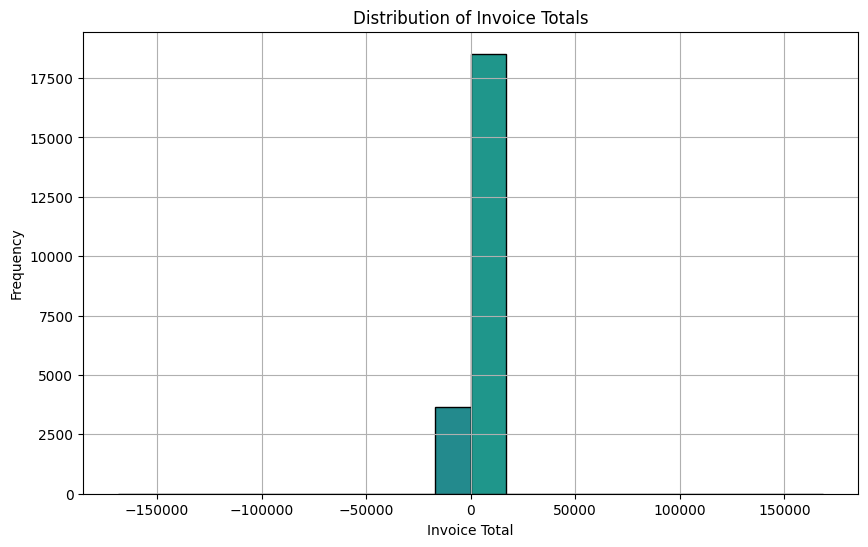

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'invoice_totals' from the previous steps
plt.figure(figsize=(10, 6))  # Adjust figure size if needed

# Generate a sequence of colors (e.g., using a colormap)
num_bins = 20  # Or however many bins you're using
colors = plt.cm.viridis(np.linspace(0, 1, num_bins))

# Plot the histogram with colored bars
n, bins, patches = plt.hist(invoice_totals, bins=num_bins, color='lightblue', edgecolor='black')

# Set individual bar colors
for i, patch in enumerate(patches):
    patch.set_facecolor(colors[i])

plt.xlabel('Invoice Total')
plt.ylabel('Frequency')
plt.title('Distribution of Invoice Totals')
plt.grid(True)
plt.show()

## Ejercicio 5: Evolución Temporal de Ventas

Utiliza la columna `InvoiceDate` para visualizar cómo evoluciona el valor de `TotalPrice` a lo largo del tiempo.

Realiza un gráfico de líneas donde el eje x sea la fecha y el eje y sea `TotalPrice`.

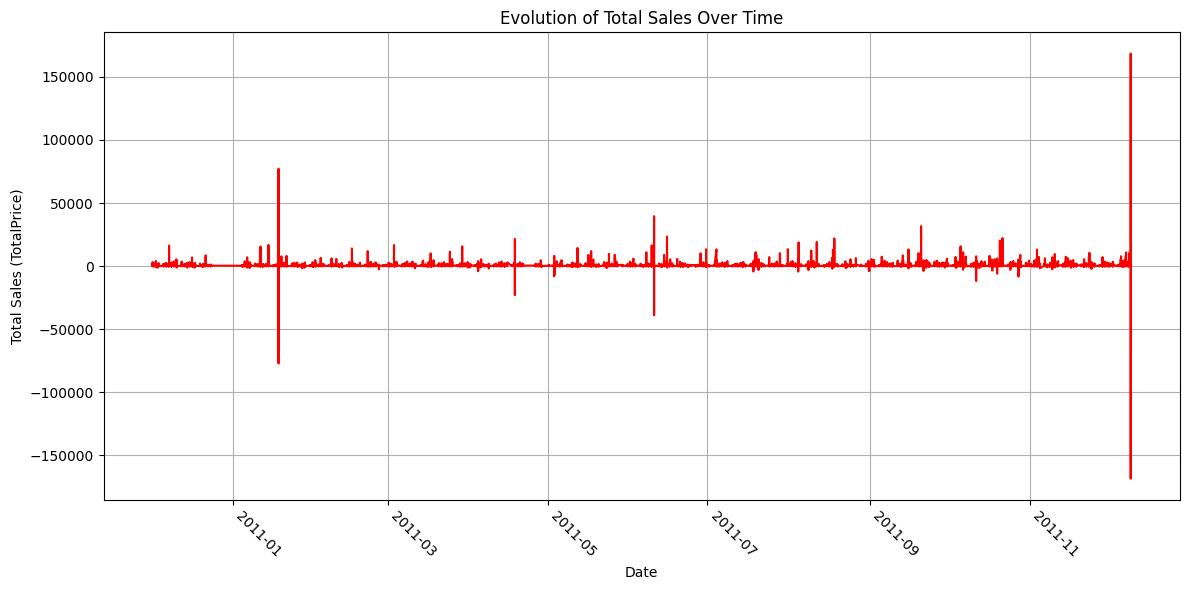

In [ ]:
# Group data by InvoiceDate and sum TotalPrice
daily_sales = data_sin_nulos.groupby('InvoiceDate')['TotalPrice'].sum()

# Create the line plot
plt.figure(figsize=(12, 6))
plt.plot(daily_sales.index, daily_sales.values, color='red')
plt.xlabel('Date')
plt.ylabel('Total Sales (TotalPrice)')
plt.title('Evolution of Total Sales Over Time')
plt.grid(True)
plt.xticks(rotation=-45, ha='left')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

## Ejercicio 6: Boxplot de UnitPrice por País

Crea un boxplot para visualizar la distribución de `UnitPrice` en función de `Country`.

Este gráfico ayudará a identificar la dispersión y posibles valores atípicos en los precios.

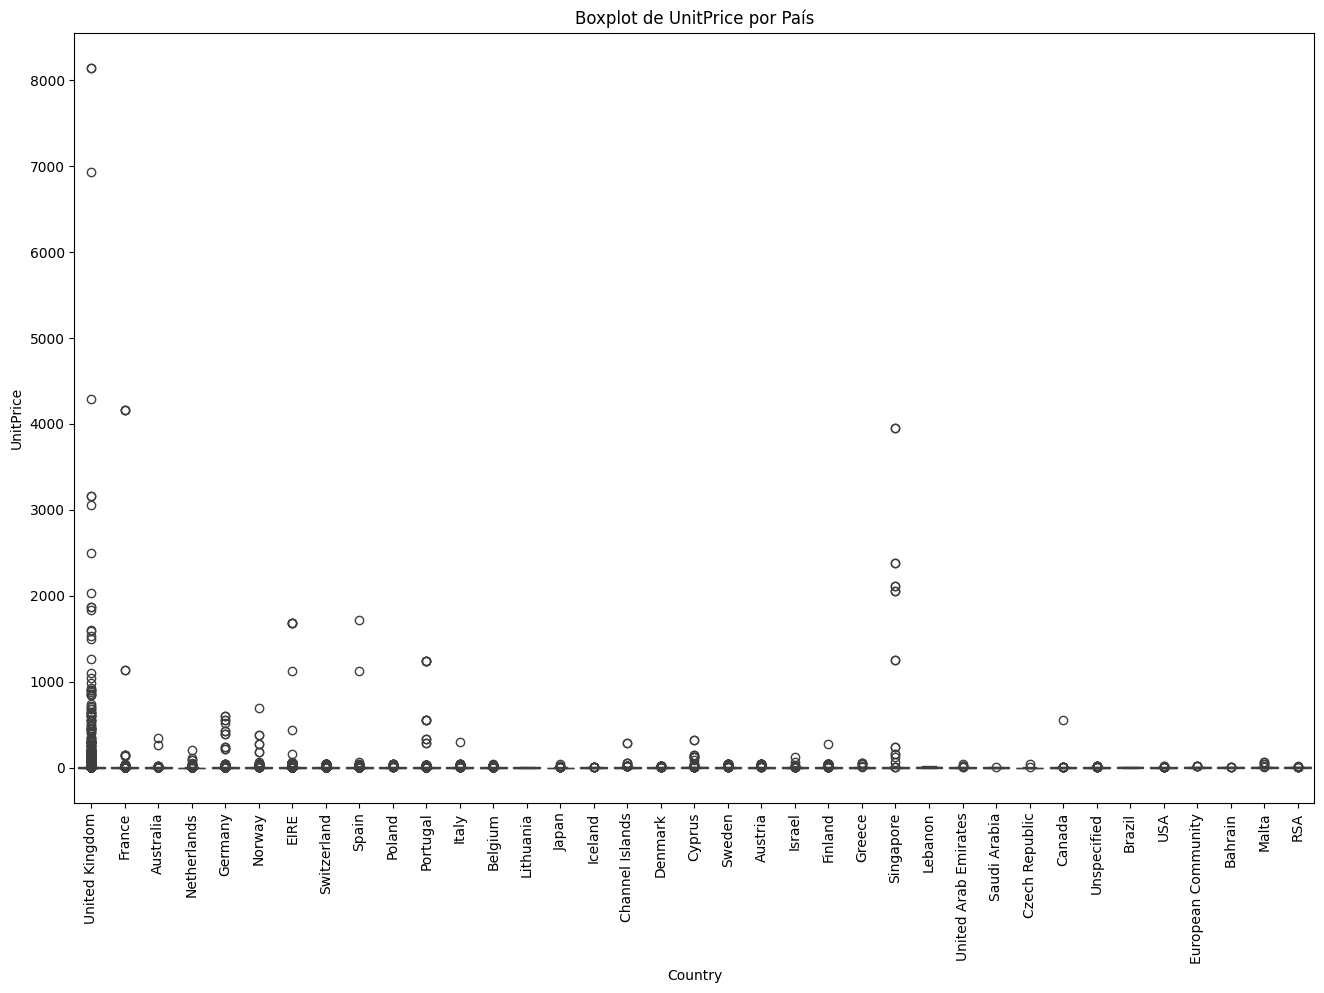

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'data_sin_nulos' is your original DataFrame
data_filtered = data_sin_nulos[data_sin_nulos['UnitPrice'] < 35000]

plt.figure(figsize=(16, 10))
sns.boxplot(x='Country', y='UnitPrice', data=data_filtered)  # Use data_filtered here
plt.xticks(rotation=90, ha="center")
plt.title('Boxplot de UnitPrice por País')
plt.show()


## Ejercicio 7: Scatter Plot entre Quantity y UnitPrice

Realiza un scatter plot para analizar la relación entre `Quantity` y `UnitPrice`.

Observa si existe alguna tendencia o correlación entre la cantidad y el precio unitario.

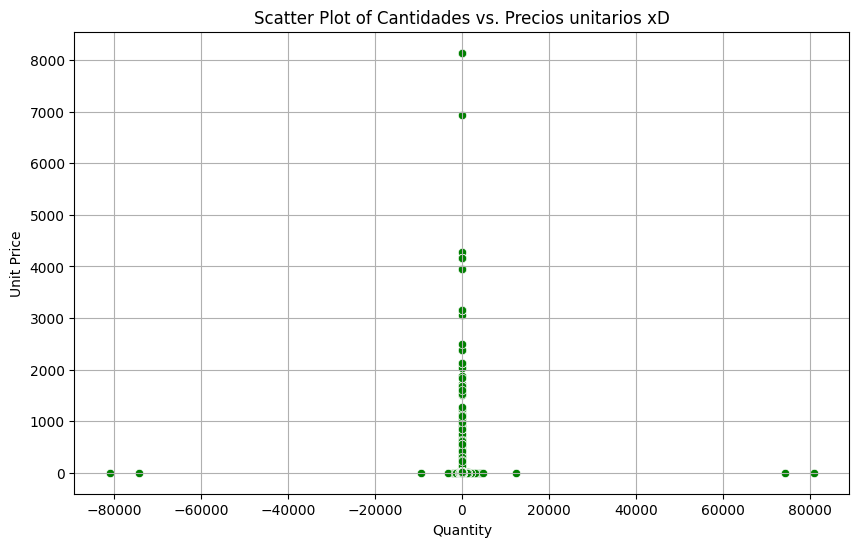

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
# Assuming 'data_sin_nulos' is your original DataFrame
data_filtered = data_sin_nulos[data_sin_nulos['UnitPrice'] < 35000]

# Assuming 'data' is your DataFrame
plt.figure(figsize=(10, 6))  # Adjust figure size if needed
sns.scatterplot(x='Quantity', y='UnitPrice', data=data_filtered, color="green")
plt.xlabel('Quantity')
plt.ylabel('Unit Price')
plt.title('Scatter Plot of Cantidades vs. Precios unitarios xD')
plt.grid(True)
plt.show()

**R=**
A simple vista, los datos evaluados no parecen tener una correlación entre ellos, ya que no se observa una pendiente positiva o negativa.

## Ejercicio 8: Distribución de Clientes por País

Utilizando la columna `Country`, crea un gráfico de pastel (pie chart) que muestre la proporción de registros por país. Elimine los que tengan muy poco porcentaje)

Este gráfico es útil para visualizar la distribución geográfica de las ventas.

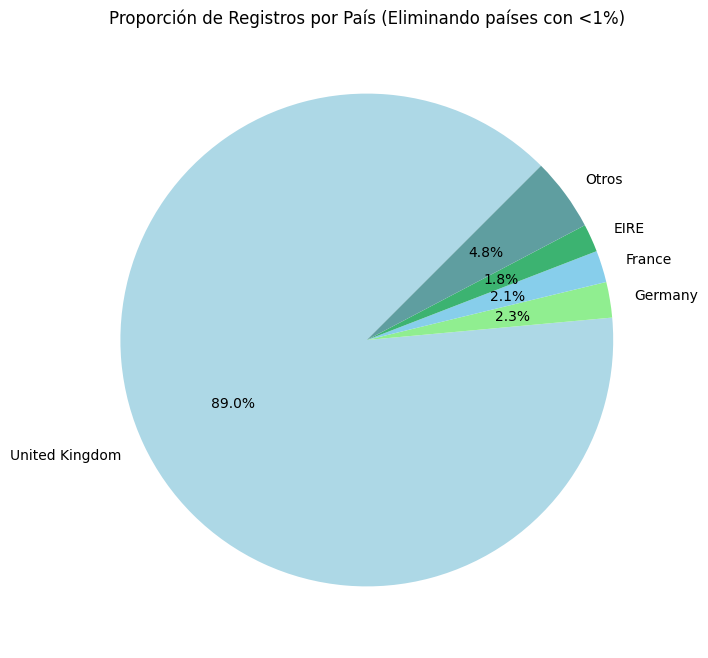

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por país y contar la frecuencia
country_counts = data_sin_nulos['Country'].value_counts()

# Calcular el porcentaje de cada país
country_percentages = country_counts / country_counts.sum() * 100

# Filtrar países con porcentaje menor a un umbral (por ejemplo, 1%)
threshold = 1
filtered_countries = country_percentages[country_percentages >= threshold]

# Otros países se agrupan en 'Otros'
other_percentage = country_percentages[country_percentages < threshold].sum()
filtered_countries['Otros'] = other_percentage

# Define a list of colors
colors = ['lightblue', 'lightgreen', 'skyblue', 'mediumseagreen', 'cadetblue', 'palegreen']

# Crear el gráfico de pastel with colors
plt.figure(figsize=(8, 8))
plt.pie(filtered_countries, labels=filtered_countries.index, autopct='%1.1f%%', startangle=45, colors=colors)
plt.title('Proporción de Registros por País (Eliminando países con <1%)')
plt.show()

## Ejercicio 9: Evolución del Precio Unitario Promedio

Agrupa los datos por la fecha (utilizando la columna `InvoiceDate`) para calcular el precio unitario promedio diario y visualízalo con un gráfico de líneas. (hagalo mensual )


Esta visualización permite observar tendencias en el precio a lo largo del tiempo.

<ipython-input-34-1ce6cf855ff6>:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_avg_price = data_sin_nulos.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['UnitPrice'].mean()


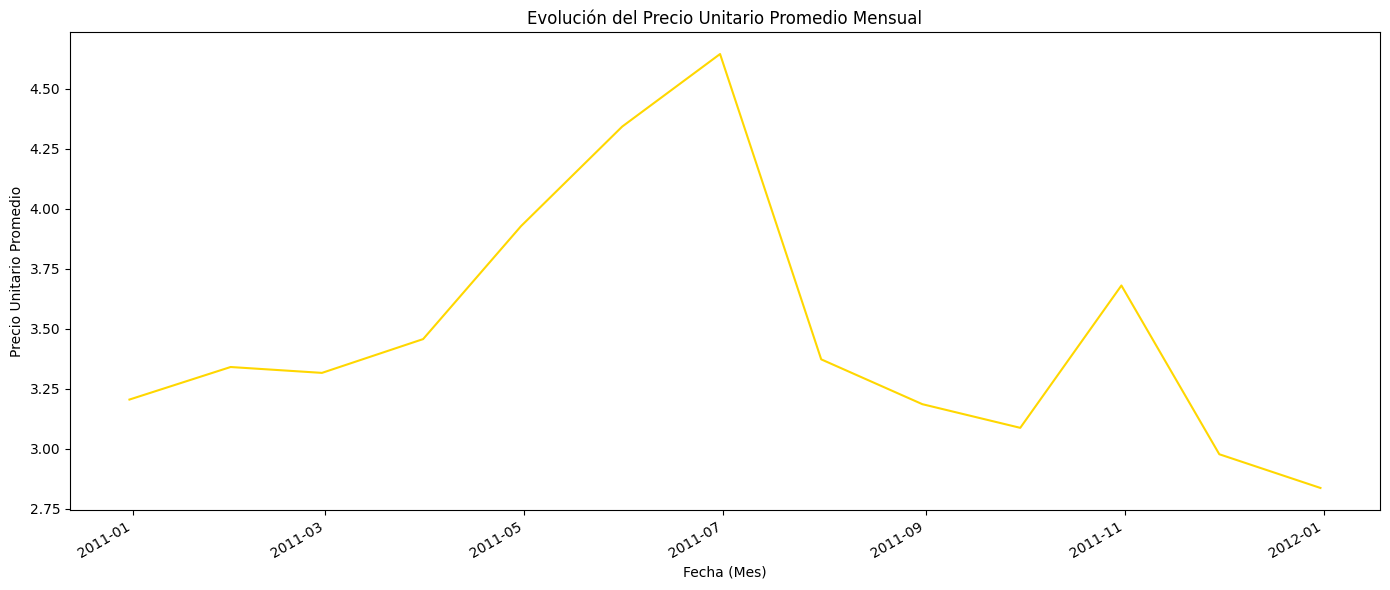

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Agrupar por mes y calcular el precio unitario promedio mensual
monthly_avg_price = data_sin_nulos.groupby(pd.Grouper(key='InvoiceDate', freq='M'))['UnitPrice'].mean()


# Crear el gráfico de líneas con color amarillo
plt.figure(figsize=(14, 6))
plt.plot(monthly_avg_price.index, monthly_avg_price.values, color='gold')  # Color changed to yellow
plt.xlabel('Fecha (Mes)')
plt.ylabel('Precio Unitario Promedio')
plt.title('Evolución del Precio Unitario Promedio Mensual')
plt.grid(False)
plt.xticks(rotation=30, ha='right')
plt.tight_layout()
plt.show()

## Ejercicio 10: Frecuencia de Productos por Descripción

Agrupa el dataset por la columna `Description` y cuenta la frecuencia de cada producto.

Visualiza los 5 productos más frecuentes con un gráfico de barras vertical.

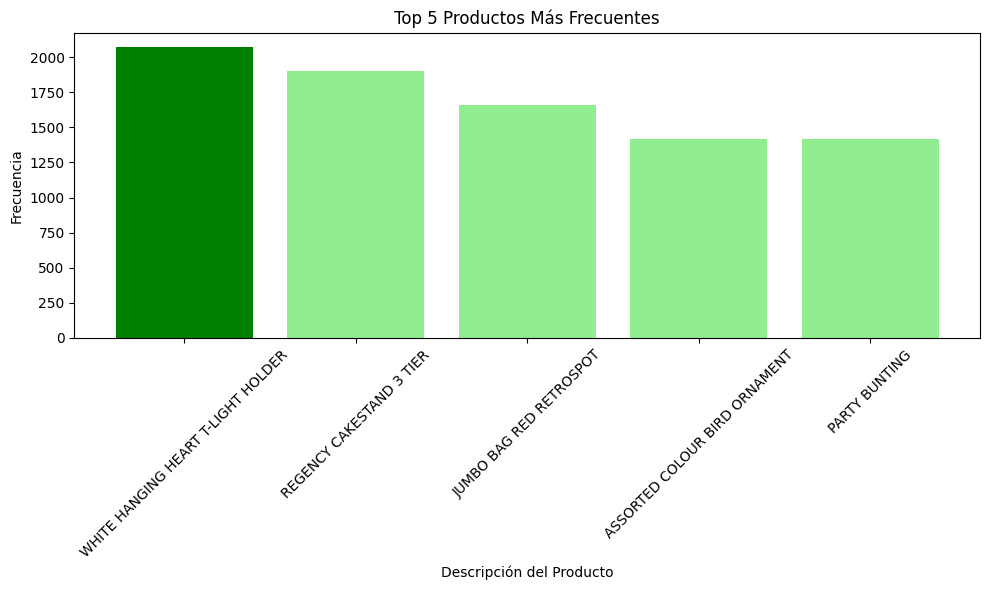

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Agrupar por descripción y contar la frecuencia
product_counts = data_sin_nulos.groupby('Description')['Description'].count().sort_values(ascending=False)

# Seleccionar los 5 productos más frecuentes
top_5_products = product_counts.head(5)

# Crear el gráfico de barras vertical
plt.figure(figsize=(10, 6))  # Ajustar tamaño si es necesario

# Get the number of bars
num_bars = len(top_5_products)

# Create an array of colors, with the first one being green and the rest lighter green
colors = ['green'] + ['lightgreen'] * (num_bars - 1)

# Plot the bar chart with specified colors
plt.bar(top_5_products.index, top_5_products.values, color=colors)

plt.xlabel('Descripción del Producto')
plt.ylabel('Frecuencia')
plt.title('Top 5 Productos Más Frecuentes')
plt.xticks(rotation=45, ha='center')  # Rotar etiquetas del eje x para mejor legibilidad
plt.tight_layout()
plt.show()

## Conclusiones Generales

En este notebook se han propuesto 10 ejercicios que cubren desde la exploración básica del dataset hasta operaciones de agrupación y la generación de diferentes tipos de gráficos para responder a preguntas de análisis de ventas.

Recuerda comentar tu código y documentar tus hallazgos en celdas de markdown para que el proceso quede bien explicado.